In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [18]:
sensor_mag_0 = pd.read_csv("/media/data/Documentos/Skyrats/SkyanalysisTools/logs/sensor_mag_0/log_21_2021-8-12-18-27-34.csv")
actuator_armed_0 = pd.read_csv("/media/data/Documentos/Skyrats/SkyanalysisTools/logs/actuator_armed_0/log_21_2021-8-12-18-27-34.csv")
t0 = actuator_armed_0['timestamp'][0]
sensor_mag_0['time_rel'] = (sensor_mag_0['timestamp'] - t0)/1e6
sensor_mag_0

,timestamp,timestamp_sample,device_id,x,y,z,temperature,error_count,is_external,time_rel
0,797159012,797158987,327690,0.320666,0.064163,-0.376206,31.750,0,0,1.210915
1,798164738,798164707,327690,0.351359,0.046916,-0.373575,31.625,0,0,2.216641
2,799170849,799170815,327690,0.359105,0.040924,-0.369775,31.625,0,0,3.222752
3,800164669,800164641,327690,0.333674,0.104063,-0.780766,31.500,0,0,4.216572
4,801170726,801170701,327690,0.358813,0.056562,-0.359982,31.375,0,0,5.222629
...,...,...,...,...,...,...,...,...,...,...
356,1153171824,1153171799,327690,0.188980,0.014323,-0.279304,27.375,0,0,357.223727
357,1154165573,1154165548,327690,0.283251,-0.010377,-0.326220,27.500,0,0,358.217476
358,1155159049,1155159024,327690,0.375037,0.054516,-0.357352,27.500,0,0,359.210952
359,1156165194,1156165168,327690,0.370360,0.057732,-0.362613,27.375,0,0,360.217097


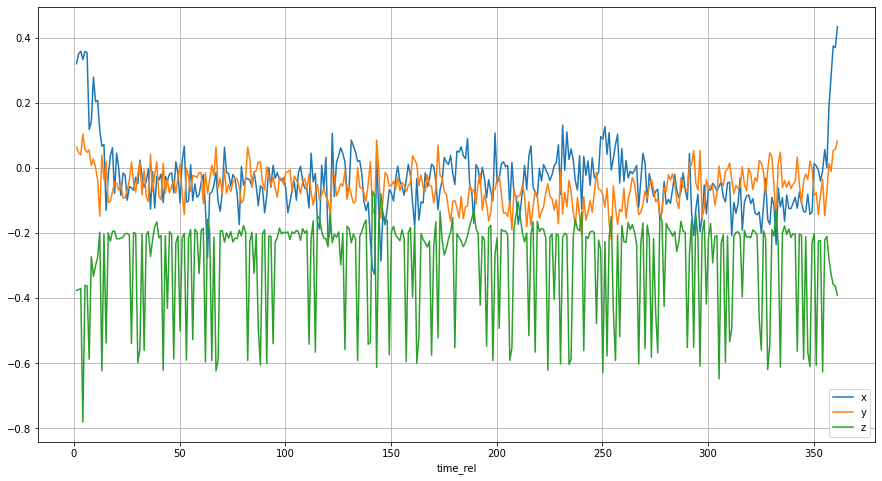

In [20]:
fig = plt.figure(figsize=(15,8))
ax = fig.gca()
# ax.set_ylim((-0.2, 0.2))
sensor_mag_0.plot(x='time_rel', y='x', ax=ax)
sensor_mag_0.plot(x='time_rel', y='y', ax=ax)
sensor_mag_0.plot(x='time_rel', y='z', ax=ax)
plt.legend()
plt.grid()